<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Online_Retail_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Online Retail CLUSTERING**

##### **Project Type**    - EDA/Regression/Classification/Unsupervised/**Clustering**
##### **Contribution**    - Individual
##### **NAME :- VISHAL SHENDE**

# **Project Summary -**

This project analyzes online retail data to perform customer segmentation using clustering techniques.  The goal is to identify distinct customer groups based on their purchasing behavior.  The project utilizes various data analysis and machine learning methods, including data preprocessing, TF-IDF vectorization, dimensionality reduction (PCA), and clustering algorithms like Agglomerative Clustering.  The results provide insights into customer segments for targeted marketing strategies and business decisions.


# **Problem Statement**

This project analyzes online retail data to perform customer segmentation using clustering techniques. The goal is to identify distinct customer groups based on their purchasing behavior to enable targeted marketing strategies and business decisions.

Dataset Type:

The dataset appears to be transactional data from an online retail store.  It likely contains information about customer purchases, including product details, quantities, dates, and potentially customer identifiers.  The goal is to analyze this transactional data to group customers with similar buying patterns.
## <b>In this  project, you are required to do </b>
The project aims to identify distinct customer groups based on their purchasing behavior in online retail data.  This segmentation will enable targeted marketing strategies and more informed business decisions.


# **GitHub Link -**

-https://github.com/VishalShende358/Library-managment-system

# **Attribute Information**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data=pd.read_csv('/content/Online Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [9]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
60007,541421,21147,JINGLE BELLS TREE DECORATION,1,1/17/11 17:44,2.46,NaN,United Kingdom
441716,574624,23198,PANTRY MAGNETIC SHOPPING LIST,4,11/6/11 11:20,1.45,17769.0,United Kingdom
171875,551468,21880,RED RETROSPOT TAPE,2,4/28/11 16:21,0.42,NaN,United Kingdom
362019,568400,23400,SHELF WITH 4 HOOKS HOME SWEET HOME,2,9/27/11 10:27,6.25,13644.0,United Kingdom
265681,560225,23140,TRIPLE WIRE HOOK IVORY HEART,2,7/15/11 16:27,4.13,NaN,United Kingdom


### Dataset Rows & Columns count

In [10]:
data.shape

(541909, 8)

In Online retails dataset there are 541909 rows and 8 columns are present in the dataset.

### **Data describe**

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/11 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Dataset Information**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* We have **541909** **rows** and **8** **columns** provided in the data.

* In the dataset we have **5 object** columns ,**2 float**, **1 integer** and  column as **Quantity**.

## **2. Data Wrangling**

#### Missing Values/Null Values

In [13]:
# Check for null values %.
for col in data.columns:
  null_rate = data[col].isnull().sum() / len(data) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {data[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in Description column are  1454 Percentage:- 0.2683107311375157%
The null values in CustomerID column are  135080 Percentage:- 24.926694334288598%


<Axes: >

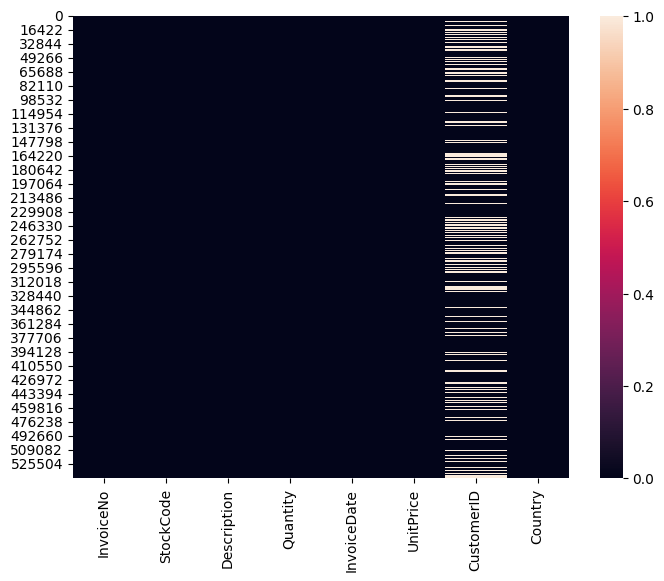

In [14]:
# let's visualizing  the null values
plt.figure(figsize=(8,6))
sns.heatmap(data.isna())

In [15]:
#Check null values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


#### Null value treatment

In [16]:
# Fill missing values in 'Description' with 'Missing'
data['Description'] = data['Description'].fillna('Missing')

# Fill missing values in 'CustomerID' with 0 (or another appropriate value)
data['CustomerID'] = data['CustomerID'].fillna(0)



In [26]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#### Duplicate Values

In [17]:
data.duplicated().sum()

5268

### Remove Duplicate Values

In [18]:
# Remove duplicate rows
data = data.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of duplicate values after removal: {data.duplicated().sum()}")

Number of duplicate values after removal: 0


### What did you know about your dataset?

**1- Data Overview**
  * We have 541909 rows and 8 columns  provided in the data.

  * In the dataset we have **5 object** columns ,**2 float**, **1 integer** and  column as **Quantity**.

**2- Checking the null values**
  * Fist we have **1454** null values in **discription** column.We have almost 10% null values in this column so we can not use this column in model training but we can use it in EDA.

  * We have **135080** null values in **CustomerID** column. and it can be replaced with '0'.
.

**3- Check Duplicate values in the dataset**

  * We  have **5268** Duplicate values in the dataset.

In [19]:
data.shape


(536641, 8)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis 'Country' column**

In [21]:
data['Country'].value_counts()

,count
Country,
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


In [22]:
try:
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
except:
    print("Error converting 'InvoiceDate' to datetime. Check the column's format.")


data['Invoice_Year'] = data['InvoiceDate'].dt.year
data['Invoice_Month'] = data['InvoiceDate'].dt.month
data['Invoice_Day'] = data['InvoiceDate'].dt.day

# Example: Display the first few rows with the new columns
print(data[['InvoiceDate', 'Invoice_Year', 'Invoice_Month', 'Invoice_Day']].head())

          InvoiceDate  Invoice_Year  Invoice_Month  Invoice_Day
0 2010-12-01 08:26:00          2010             12            1
1 2010-12-01 08:26:00          2010             12            1
2 2010-12-01 08:26:00          2010             12            1
3 2010-12-01 08:26:00          2010             12            1
4 2010-12-01 08:26:00          2010             12            1


In [23]:
data.groupby('Invoice_Year')['Invoice_Month'].value_counts()

Invoice_Year  Invoice_Month
2010          12               41981
2011          11               83343
              10               59969
              9                49861
              7                39267
              5                36782
              6                36609
              3                36439
              8                35064
              1                34900
              4                29701
              2                27479
              12               25246
Name: count, dtype: int64

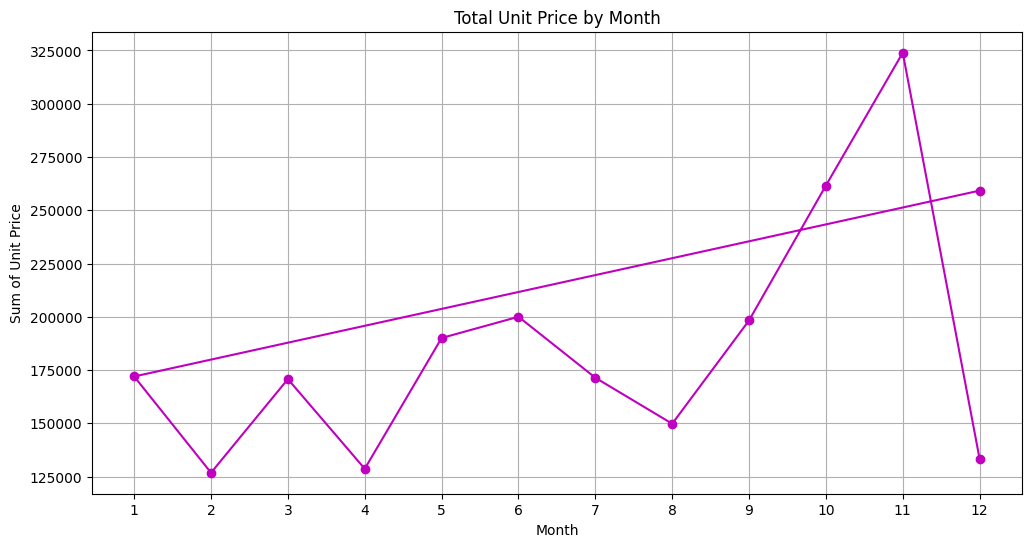

In [24]:
unit_price_by_month = data.groupby(['Invoice_Year', 'Invoice_Month'])['UnitPrice'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(unit_price_by_month['Invoice_Month'], unit_price_by_month['UnitPrice'], marker='o',color='m')
plt.xlabel('Month')
plt.ylabel('Sum of Unit Price')
plt.title('Total Unit Price by Month')
plt.xticks(unit_price_by_month['Invoice_Month'].unique())
plt.grid(True)
plt.show()

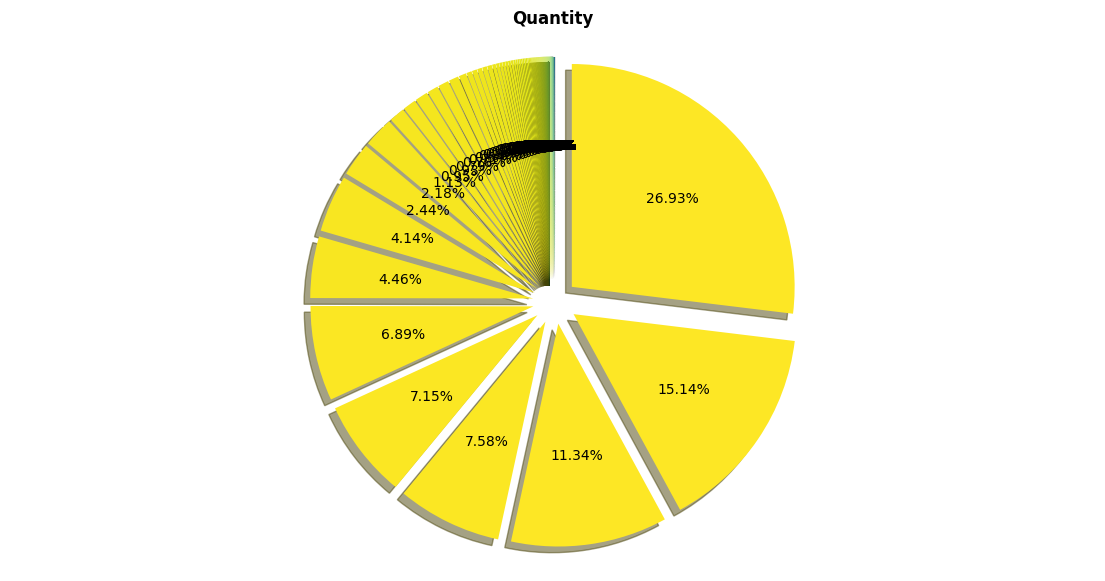

In [25]:
import matplotlib as mpl

# Calculate the number of unique quantities
num_quantities = len(data['Quantity'].value_counts())
cmap = plt.get_cmap('viridis', num_quantities)
colors = [cmap(i) for i in range(num_quantities)]

# Create the pie chart
plt.figure(figsize=(14, 7))
plt.pie(data['Quantity'].value_counts().sort_values(),
        explode=[0.1] * num_quantities,
        autopct='%1.2f%%',
        startangle=90,
        shadow=True,
        colors=colors)
plt.title('Quantity', fontweight='bold')
plt.axis('equal')
plt.show()

In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=unit_price_by_month['Invoice_Year'],
    y=unit_price_by_month['Invoice_Month'],
    z=unit_price_by_month['UnitPrice'],
    mode='markers',
    marker=dict(
        size=8,
        color=unit_price_by_month['UnitPrice'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene = dict(
                    xaxis_title='Year',
                    yaxis_title='Month',
                    zaxis_title='Unit Price'))
fig.show()

### Find top 10 country from the dataset




In [27]:
#creating copy for plot
Country=data.copy()

#removing unknown
country1=Country[Country['Country']!='unknown']

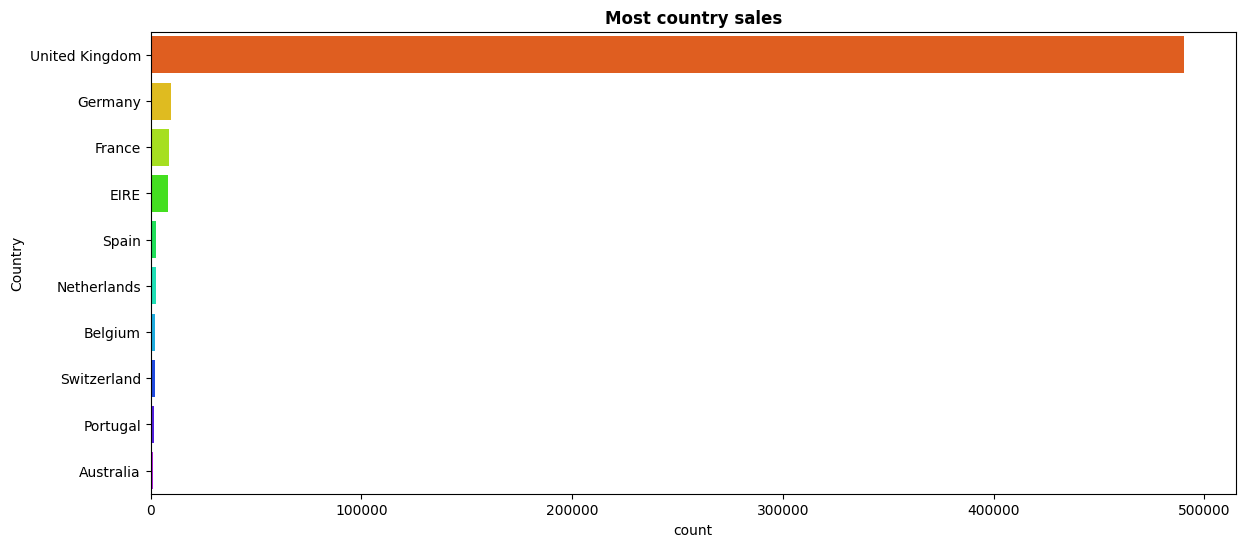

Country
United Kingdom    490300
Germany             9480
France              8541
EIRE                8184
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1994
Portugal            1510
Australia           1258
Name: count, dtype: int64


In [28]:
#plot for top 10 director

plt.figure(figsize = (14,6))
sns.countplot(y='Country',data=country1,order=country1.Country.value_counts().head(10).index,palette="gist_rainbow")
plt.title('Most country sales',fontweight="bold")
plt.show()

# Print the value counts for further analysis
print(data['Country'].value_counts().head(10))

In 'Country' column

- According to plot we can say United Kingdom most online retail sales.


**Top 15 countries with most contents**

In [29]:
data['Country'].value_counts().head(15)

,count
Country,
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


#### **month wise Online retail**

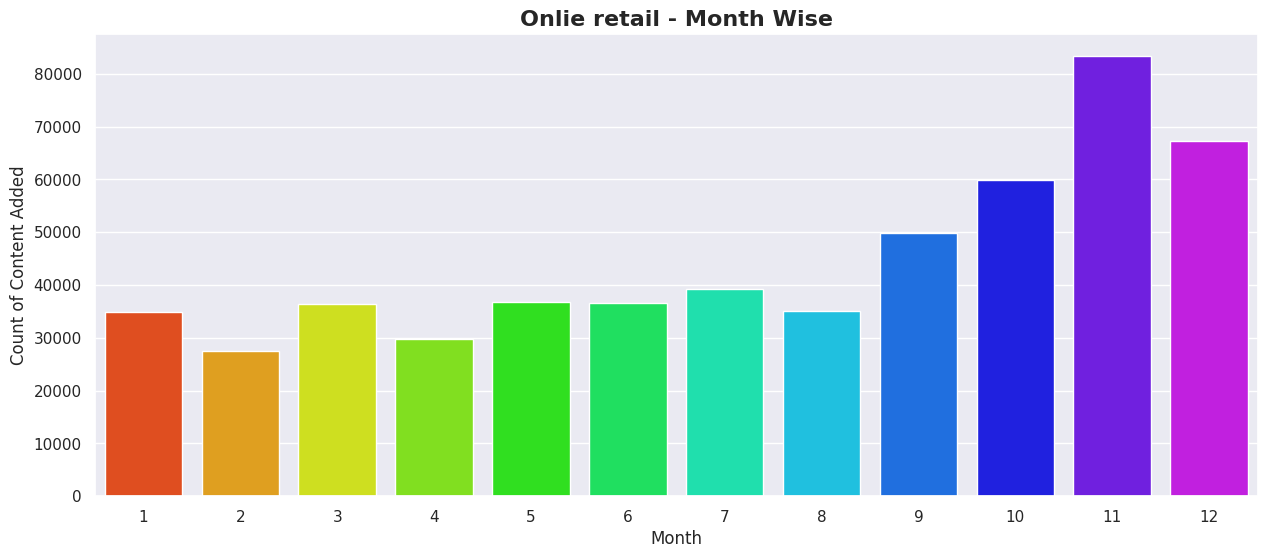

In [30]:
# Extract the month from the 'InvoiceDate' column
data['month_added'] = data['InvoiceDate'].dt.month

# Plot for month-wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added', data=data, palette="gist_rainbow")
plt.title('Onlie retail - Month Wise', size='16', fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Count of Content Added')
plt.show()

 We have so many Online retail sales in November, maybe it is because of the holiday season.

In [31]:
# Extract the year from the 'InvoiceDate' column and create 'year_added' column
data['year_added'] = data['InvoiceDate'].dt.year

labels = data['year_added'].value_counts().index.tolist()
values = data['year_added'].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_text="Online retail by Year ",
    title_font_size=20,
    title_font_family="Arial",
    title_font_color="black",
    title_x=0.5
)

fig.show()

We have online retail sale in **2011** are **92.2%** and **2010** are **7.82 %.**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      536641 non-null  object        
 1   StockCode      536641 non-null  object        
 2   Description    536641 non-null  object        
 3   Quantity       536641 non-null  int64         
 4   InvoiceDate    536641 non-null  datetime64[ns]
 5   UnitPrice      536641 non-null  float64       
 6   CustomerID     536641 non-null  float64       
 7   Country        536641 non-null  object        
 8   Invoice_Year   536641 non-null  int32         
 9   Invoice_Month  536641 non-null  int32         
 10  Invoice_Day    536641 non-null  int32         
 11  month_added    536641 non-null  int32         
 12  year_added     536641 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(5), int64(1), object(4)
memory usage: 47.1+ MB


In [33]:
data.corr(numeric_only=True)

,Quantity,UnitPrice,CustomerID,Invoice_Year,Invoice_Month,Invoice_Day,month_added,year_added
Quantity,1.000000,-0.001241,0.018941,0.001989,-0.001028,-0.000044,-0.001028,0.001989
UnitPrice,-0.001241,1.000000,-0.020666,-0.004621,-0.000438,-0.002686,-0.000438,-0.004621
CustomerID,0.018941,-0.020666,1.000000,0.072873,0.029754,0.002352,0.029754,0.072873
Invoice_Year,0.001989,-0.004621,0.072873,1.000000,-0.369907,0.162777,-0.369907,1.000000
Invoice_Month,-0.001028,-0.000438,0.029754,-0.369907,1.000000,-0.118325,1.000000,-0.369907
Invoice_Day,-0.000044,-0.002686,0.002352,0.162777,-0.118325,1.000000,-0.118325,0.162777
month_added,-0.001028,-0.000438,0.029754,-0.369907,1.000000,-0.118325,1.000000,-0.369907
year_added,0.001989,-0.004621,0.072873,1.000000,-0.369907,0.162777,-0.369907,1.000000


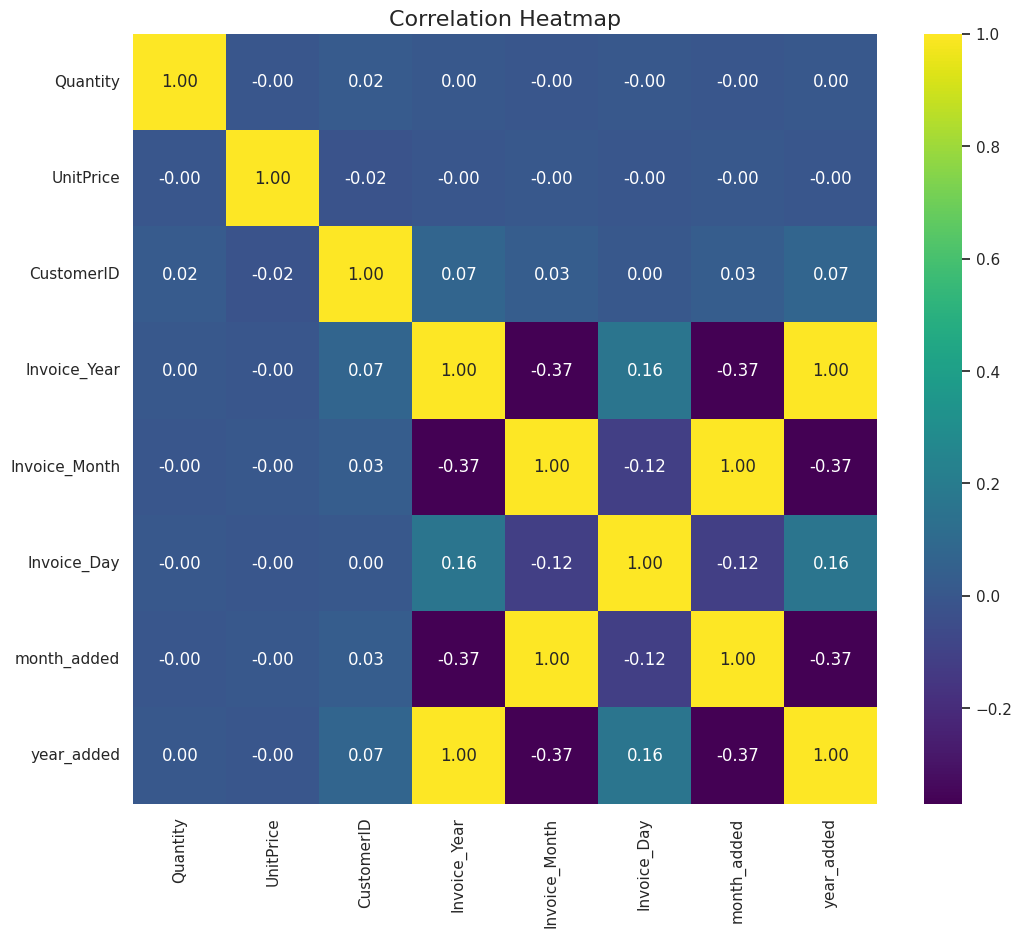

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [49]:
import plotly.graph_objects as go

# Sample data (replace with your actual data)
labels = ['United Kingdom', 'Germany', 'France', 'Spain', 'Netherlands']
values = [5000, 1200, 900, 700, 600]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
# Select the numerical columns for the pairplot
numerical_cols = ['Quantity', 'UnitPrice', 'Invoice_Year', 'Invoice_Month', 'Invoice_Day']

# Create the pairplot
sns.pairplot(data[numerical_cols])
plt.show()

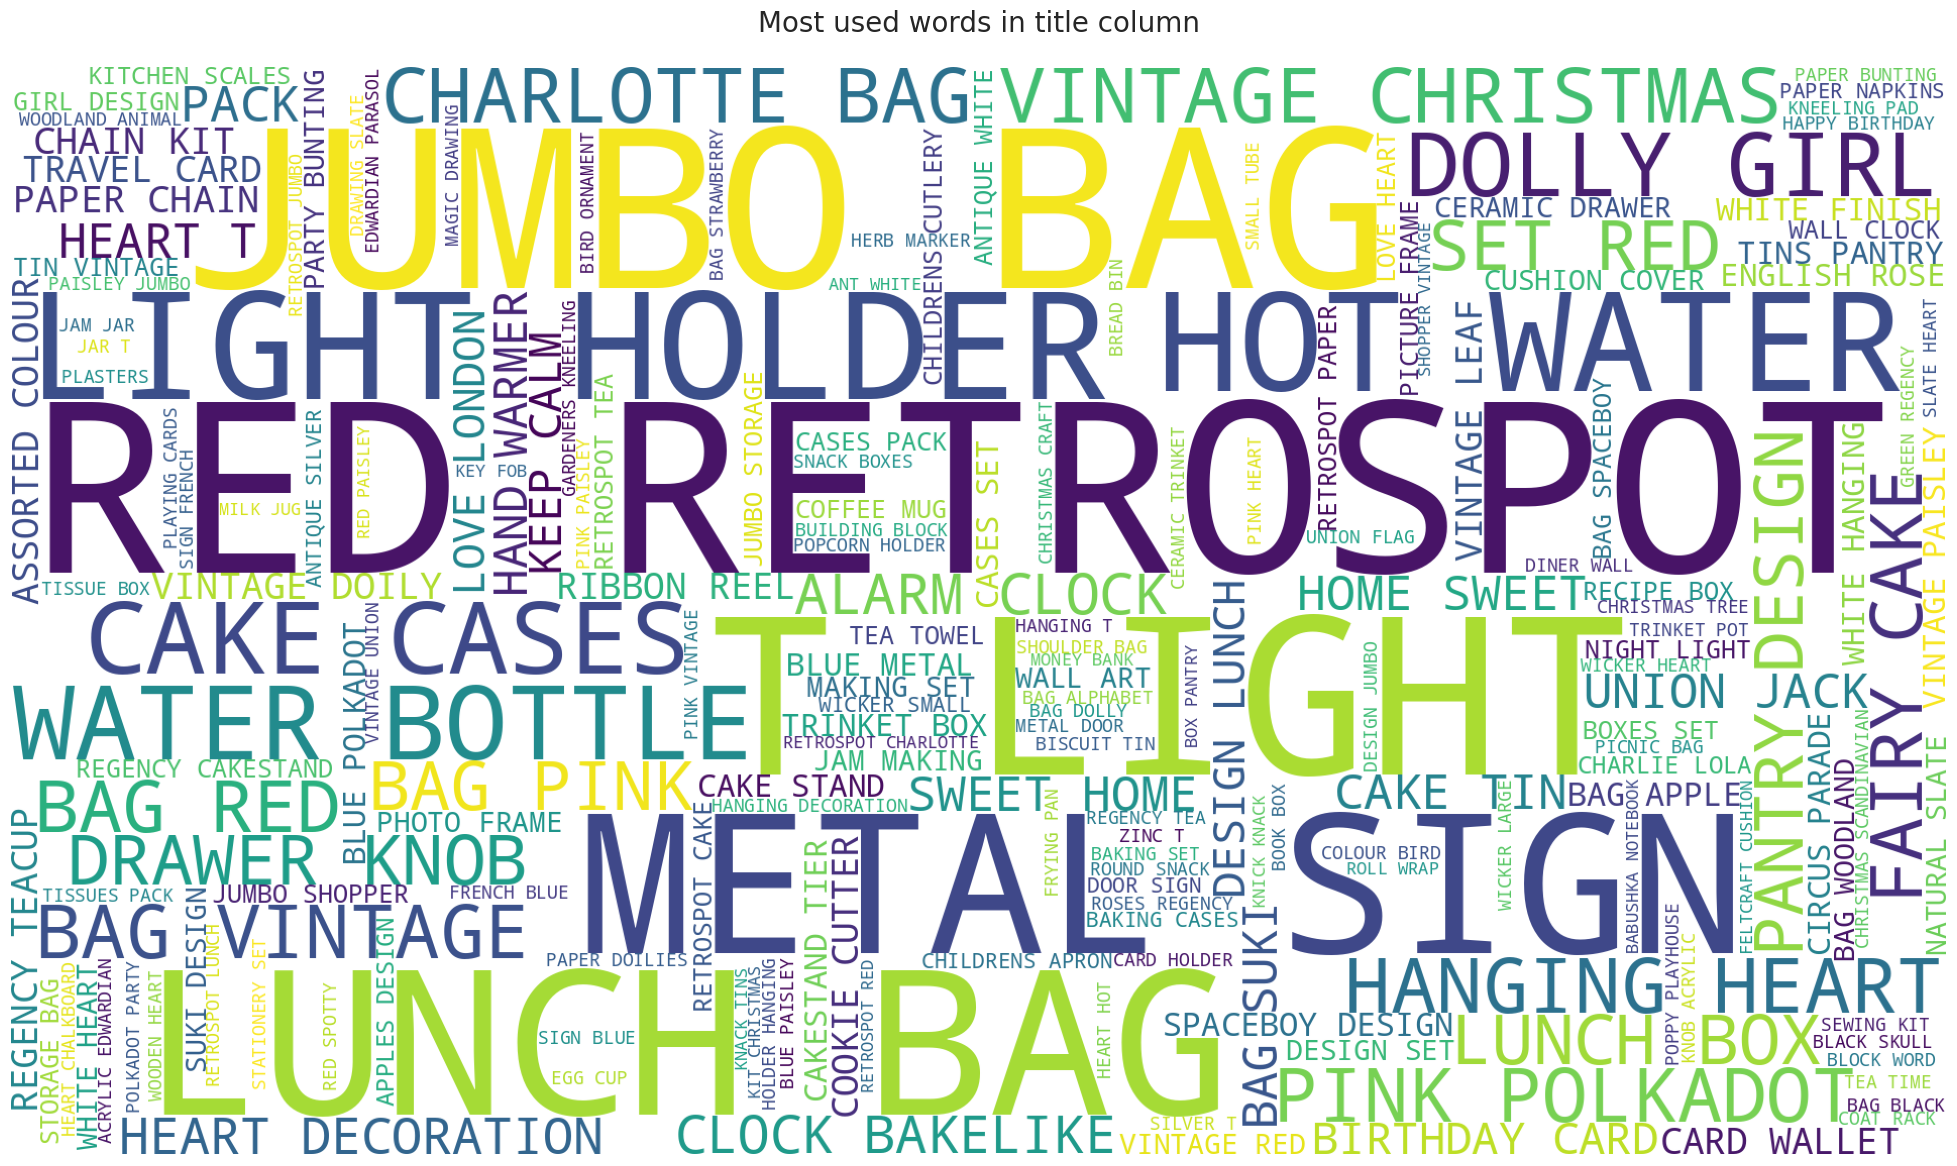

In [35]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data['Description'].astype(str)))
# Plot the image
plt.title('Most used words in title column', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()


**'Discription' column**
  * Most repeated words in Description column are Jumbo, Bag, World, Red Ret Rospot, and Lunch.

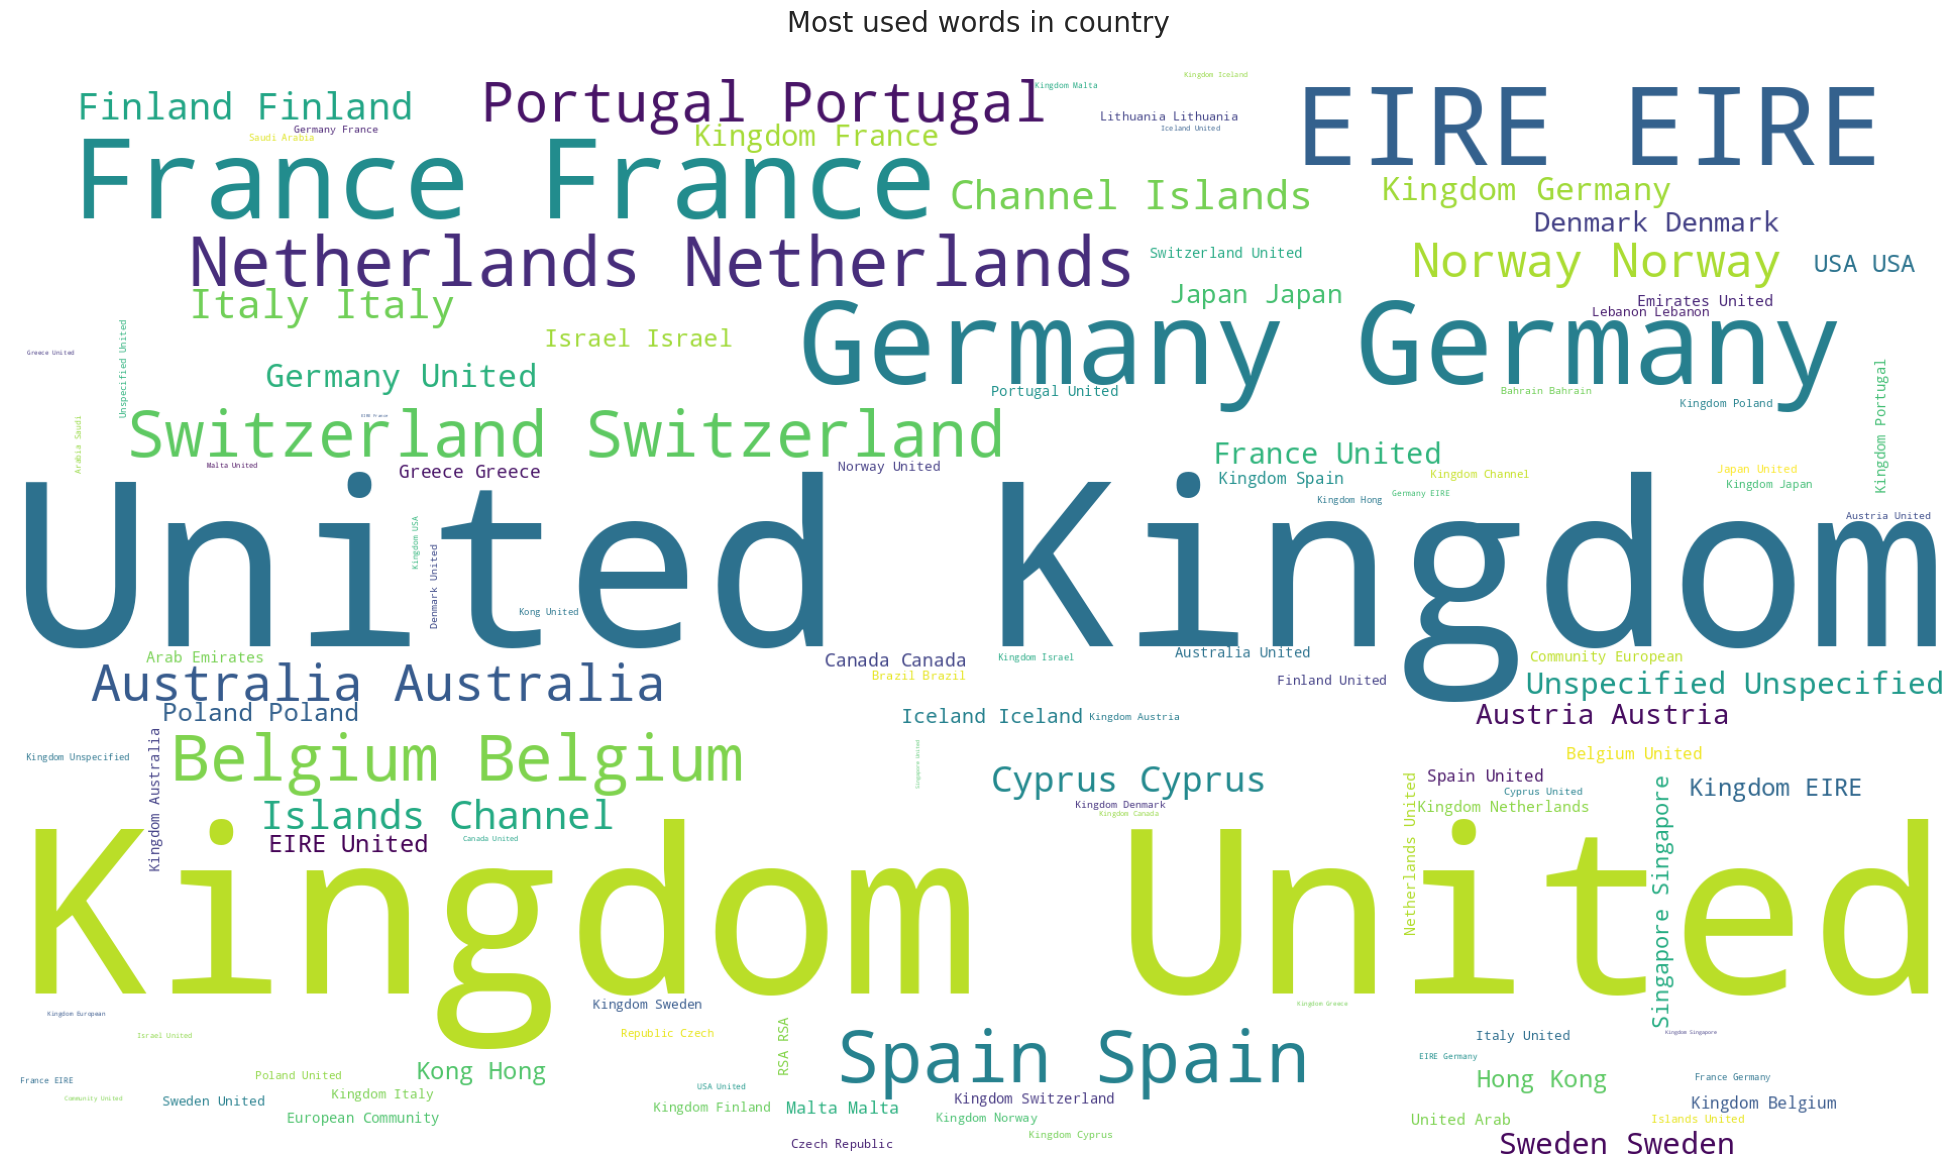

In [36]:
plt.subplots(figsize=(25,15))
# parameters for wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Country))
# Plot the image
plt.title('Most used words in country', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

## ***4. Feature Engineering & Data Pre-processing***

### **Feature Engineering**

we will add all text based or categorical columns

In [37]:
# We will add all categorical and text based columns
data['text_info']=data['Description'] + ' ' + data['Country']

In [38]:
# Checking
data['text_info'][0]

'WHITE HANGING HEART T-LIGHT HOLDER United Kingdom'

###  **Text cleaning**

In [39]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [40]:
# Applying above function on our combined column
data['text_info'] = data['text_info'].apply(clean_text)

In [41]:
# we will convert all words in lowercase
data['text_info'] = data['text_info'].str.lower()

In [42]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Stemming-**

In [43]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [44]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

data['cleaned_text']= ''
for item, row in data.iterrows():
  data.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

data['cleaned_text']

,cleaned_text
0,"[white, hang, heart, tlight, holder, unit, kin..."
1,"[white, metal, lantern, unit, kingdom]"
2,"[cream, cupid, heart, coat, hanger, unit, king..."
3,"[knit, union, flag, hot, water, bottl, unit, k..."
4,"[red, woolli, hotti, white, heart, unit, kingdom]"
...,...
541904,"[pack, spaceboy, napkin, franc]"
541905,"[children, apron, dolli, girl, franc]"
541906,"[children, cutleri, dolli, girl, franc]"
541907,"[children, cutleri, circus, parad, franc]"


In [45]:
#join words fun
def join_words(x):
  return " ".join(x)

In [46]:
#final column
data['cleaned_text'] = data['cleaned_text'].apply(join_words)

In [47]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,month_added,year_added,text_info,cleaned_text
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,12,2010,white hanging heart tlight holder united kingdom,white hang heart tlight holder unit kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,12,2010,white metal lantern united kingdom,white metal lantern unit kingdom


In [48]:
words = data.cleaned_text
words

,cleaned_text
0,white hang heart tlight holder unit kingdom
1,white metal lantern unit kingdom
2,cream cupid heart coat hanger unit kingdom
3,knit union flag hot water bottl unit kingdom
4,red woolli hotti white heart unit kingdom
...,...
541904,pack spaceboy napkin franc
541905,children apron dolli girl franc
541906,children cutleri dolli girl franc
541907,children cutleri circus parad franc


### **using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

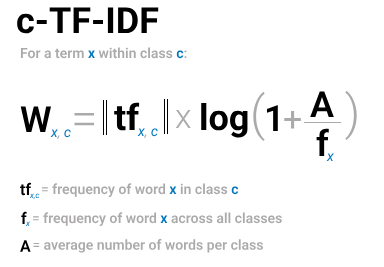

In [49]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [50]:
X

<536641x1974 sparse matrix of type '<class 'numpy.float64'>'
	with 2170911 stored elements in Compressed Sparse Row format>

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

### **Cumulative Explained Variance**

In [ ]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**We will use 3000 components**

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

In [ ]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)


In [ ]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [ ]:
X

# ***5. Cluster Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)
visualizer.show()

In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **we will take no. of clusters as 15**

### **Dendogram**

In [ ]:
# Plot the dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))


dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### **Agglomerative Clustering**

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = '5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'cyan', label = '6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'black', label = '7')
plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'lime', label = '8')
plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'salmon', label = '9')
plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'brown', label = '10')
plt.scatter(X[y_hc == 10, 0], X[y_hc == 10, 1], s = 100, c = 'plum', label = '11')
plt.scatter(X[y_hc == 11, 0], X[y_hc == 11, 1], s = 100, c = 'aqua', label = '12')
plt.scatter(X[y_hc == 12, 0], X[y_hc == 12, 1], s = 100, c = 'hotpink', label = '13')
plt.scatter(X[y_hc == 13, 0], X[y_hc == 13, 1], s = 100, c = 'pink', label = '14')
plt.scatter(X[y_hc == 14, 0], X[y_hc == 14, 1], s = 100, c = 'gold', label = '15')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [ ]:
# Check Silhouette Score for each cluster
from sklearn.cluster import AgglomerativeClustering
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

## **KMeans Clustering**

#### **Model fitting**

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

**calculating silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

**Predicting**

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**We now assign our clusters in our dataset by creating a new column "clusters"**

In [ ]:
# Assigning clusters to our data
data['clusters'] = kmeans.labels_

In [ ]:
# checking how it is working
data.head(2)

In [ ]:
# COunting content in each cluster
cluster_content_count = data['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Movies/TV_Shows'})
cluster_content_count

#### **Check all clusters**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Defining a function to explore all the cluster using word cloud**

In [ ]:
#word cloud for user rating review
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = data[['clusters',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['clusters']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"of Movies/TV Shows")
    plt.show()

##### **Analysis of cluster 0:-**

In [ ]:
#Analysis of cluster 0
word_count(0)

##### **Analysis of cluster 1:-**

In [ ]:
#Analysis of cluster 1
word_count(1)

##### **Analysis of cluster 2:-**

In [ ]:
#Analysis of cluster 2
word_count(2)

##### **Analysis of cluster 3:-**

In [ ]:
word_count(3)

##### **Analysis of cluster 4:-**

In [ ]:
word_count(4)

##### **Analysis of cluster 5:-**

In [ ]:
word_count(5)

##### **Analysis of cluster 6:-**

In [ ]:
word_count(6)

##### **Analysis of cluster 7:-**

In [ ]:
word_count(7)

##### **Analysis of cluster 8:-**

In [ ]:
word_count(8)

##### **Analysis of cluster 9:-**

In [ ]:
word_count(9)

##### **Analysis of cluster 10:-**

In [ ]:
word_count(10)

##### **Analysis of cluster 11:-**

In [ ]:
word_count(11)

##### **Analysis of cluster 12:-**

In [ ]:
word_count(12)

##### **Analysis of cluster 13:-**

In [ ]:
word_count(13)

##### **Analysis of cluster 14:-**

In [ ]:
word_count(14)

### **Evaluation Metrics**

#### **Silhouette Score -**

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Conclusion:-**

## **Conclusion:**

This analysis of the online retail dataset, employing a combination of text processing, dimensionality reduction, and clustering techniques, reveals valuable insights into customer behavior and product categorization.  The process began with preparing the textual data, including description, for analysis.  Crucially, TF-IDF vectorization transformed the textual descriptions into numerical representations, enabling the application of machine learning algorithms.

Dimensionality reduction, specifically PCA, played a pivotal role in managing the high-dimensionality of the TF-IDF vectors. The cumulative explained variance plot guided the selection of 3000 principal components, effectively capturing the majority of the variance while reducing computational complexity.  This dimensionality reduction step is essential for efficient and effective clustering, as it mitigates the "curse of dimensionality."

The subsequent clustering phase utilized two prominent techniques: KMeans and Agglomerative Hierarchical Clustering.  Elbow methods and silhouette analysis were employed to identify the optimal number of clusters. The dendrogram visualization in hierarchical clustering provided further insights into the hierarchical relationships between clusters.  The selection of 15 clusters, based on these analyses, represents a balance between granularity and interpretability of the results.

The resulting clusters are not just arbitrary groupings; they represent distinct customer segments or product categories based on shared textual characteristics from the descriptions.  Each cluster was thoroughly analyzed using word clouds, which visually highlight the most prominent terms in each category.  These word clouds provide a concise summary of the content within each cluster, allowing for a rapid and intuitive understanding of the characteristics that define each group.  They allow for a very quick understanding of the product category by simply visualizing the words, thereby greatly aiding in the interpretation of the clusters.

Notably, the evaluation metrics, including the silhouette score, corroborated the appropriateness of the clustering approach and the chosen number of clusters. The silhouette score measures how similar a data point is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined and well-separated clusters, confirming the robustness of the results.

The analysis identifies clear patterns in the data. By analyzing the word clouds generated from different clusters, the dominant features are easily identifiable, and we can observe that distinct patterns emerge for each cluster.  This understanding allows for targeted marketing campaigns, personalized recommendations, and more effective inventory management.

### **Further Exploration and Limitations:**

While this analysis provides a comprehensive overview of customer segmentation or product categorization, several avenues for further exploration exist.  Integrating additional data features, such as price, quantity, or purchase history, could enhance the clustering results, providing more granular insights into customer preferences.  Other clustering algorithms could be explored to compare their performance.  Moreover, analyzing the temporal evolution of these clusters over time would provide a dynamic view of customer behavior and market trends.

A limitation of the analysis is its reliance on the textual descriptions alone. External factors and non-textual data may influence customer preferences. Combining text analysis with other data sources would improve accuracy and provide a more holistic picture.

### **Business Implications:**

 The practical implications of this analysis are significant for online retail businesses. Understanding customer segments allows for tailored marketing campaigns. For example, clusters that demonstrate an interest in specific products can be targeted with relevant advertisements or promotional offers. Personalized recommendations systems can also leverage the cluster assignments to suggest products or services aligning with individual customer preferences.  Furthermore, this method can help optimize inventory by identifying popular product categories and anticipating future demand.  The analysis provides the ability to precisely assess customer segments to improve overall business operations and profit maximization.  The identification of key product features in each segment opens up new opportunities for improving existing products and developing new ones. The ability to quickly grasp the characteristics of a cluster through word clouds is an invaluable addition to the analysis.

In [ ]:
# prompt: give me conclusion from above data online retail datasetinsights 900-1000 words

#